Punto 5

In [33]:
import pandas as pd
import os

# Definir la ruta base donde se encuentran los archivos
base_path = r'C:\Users\Diego\Documents\GitHub\EPH mar del plata'

# Cargar archivos correspondientes al año 2004
hogar_2004 = pd.read_stata(os.path.join(base_path, 'EPH2004', 'Hogar_t104.dta'))
individual_2004 = pd.read_stata(os.path.join(base_path, 'EPH2004', 'usu_individual_T104.dta'))

# Cargar archivos correspondientes al año 2024
hogar_2024 = pd.read_excel(os.path.join(base_path, 'EPH2024', 'usu_hogar_T124.xlsx'))
individual_2024 = pd.read_excel(os.path.join(base_path, 'EPH2024', 'usu_individual_T124.xlsx'))

# Filtrar los datos para conservar únicamente el aglomerado de Mar del Plata (código 13)
individual_2004 = individual_2004[individual_2004['aglomerado'] == 13]
individual_2024 = individual_2024[individual_2024['AGLOMERADO'] == 13]

# Función para analizar el estado laboral y el IPCF promedio
def analizar_estado_y_ipcf(df, estado_col='ESTADO', ipcf_col='ipcf'):
    # Contar la cantidad de personas según su estado laboral
    conteo = df[estado_col].value_counts().rename({1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'})

    # Calcular el IPCF promedio por estado laboral
    media_ipcf = df.groupby(estado_col)[ipcf_col].mean().dropna().rename(index={1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'})

    return conteo, media_ipcf

# Resultados para el año 2004
print("==== AÑO 2004 ====")
conteo_2004, media_ipcf_2004 = analizar_estado_y_ipcf(individual_2004, estado_col='estado', ipcf_col='ipcf')
print("Cantidad de personas por estado laboral:")
print(conteo_2004)
print("\nIPCF promedio por estado laboral:")
print(media_ipcf_2004)

# Resultados para el año 2024
print("\n==== AÑO 2024 ====")
conteo_2024, media_ipcf_2024 = analizar_estado_y_ipcf(individual_2024, estado_col='ESTADO', ipcf_col='IPCF')
print("Cantidad de personas por estado laboral:")
print(conteo_2024)
print("\nIPCF promedio por estado laboral:")
print(media_ipcf_2024)


==== AÑO 2004 ====
Cantidad de personas por estado laboral:
estado
Entrevista individual no realizada (no respuesta al cuestion    0
Ocupado                                                         0
Desocupado                                                      0
Inactivo                                                        0
Menor de 10 años                                                0
Name: count, dtype: int64

IPCF promedio por estado laboral:
Series([], Name: ipcf, dtype: float64)

==== AÑO 2024 ====
Cantidad de personas por estado laboral:
ESTADO
Ocupado       1012
Inactivo       787
4              284
Desocupado      86
Name: count, dtype: int64

IPCF promedio por estado laboral:
ESTADO
Ocupado       252442.901492
Desocupado    134357.591860
Inactivo      184421.973202
4             136927.031021
Name: IPCF, dtype: float64


C:\Users\Diego\AppData\Local\Temp\ipykernel_4828\207008270.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_ipcf = df.groupby(estado_col)[ipcf_col].mean().dropna().rename(index={1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'})


Punto 6

In [35]:
import pandas as pd

# Cargar y procesar datos del año 2004

# Cargar los datos individuales del primer trimestre de 2004
datos_2004 = pd.read_stata(r'C:\Users\Diego\Documents\GitHub\EPH mar del plata\EPH2004\usu_individual_T104.dta')

# Filtrar personas que respondieron la pregunta sobre condición de actividad (h15 = "Sí")
respondieron_2004 = datos_2004[datos_2004['h15'] == 'Sí']

# Filtrar personas que no respondieron la pregunta (h15 distinto de "Sí")
norespondieron_2004 = datos_2004[datos_2004['h15'] != 'Sí']

# Seleccionar columnas relevantes
respondieron_2004 = respondieron_2004[['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera']]
norespondieron_2004 = norespondieron_2004[['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera']]

# Mostrar cantidad de personas que respondieron y no respondieron en 2004
print(f"Personas que respondieron (2004): {len(respondieron_2004)}")
print(f"Personas que no respondieron (2004): {len(norespondieron_2004)}")

# Cargar y procesar datos del año 2024

# Cargar los datos individuales del primer trimestre de 2024
datos_2024 = pd.read_excel(r'C:\Users\Diego\Documents\GitHub\EPH mar del plata\EPH2024\usu_individual_T124.xlsx')

# Filtrar personas que respondieron la pregunta sobre condición de actividad (H15 = 1)
respondieron_2024 = datos_2024[datos_2024['H15'] == 1]

# Filtrar personas que no respondieron la pregunta (H15 distinto de 1)
norespondieron_2024 = datos_2024[datos_2024['H15'] != 1]

# Seleccionar columnas relevantes
respondieron_2024 = respondieron_2024[['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA']]
norespondieron_2024 = norespondieron_2024[['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA']]

# Mostrar cantidad de personas que respondieron y no respondieron en 2024
print(f"Personas que respondieron (2024): {len(respondieron_2024)}")
print(f"Personas que no respondieron (2024): {len(norespondieron_2024)}")

# Mostrar resumen general de ambos años
print("\nResumen de las respuestas de 2004:")
print(f"Respondieron: {len(respondieron_2004)}")
print(f"No respondieron: {len(norespondieron_2004)}")

print("\nResumen de las respuestas de 2024:")
print(f"Respondieron: {len(respondieron_2024)}")
print(f"No respondieron: {len(norespondieron_2024)}")


Personas que respondieron (2004): 37439
Personas que no respondieron (2004): 7850
Personas que respondieron (2024): 40411
Personas que no respondieron (2024): 5639

Resumen de las respuestas de 2004:
Respondieron: 37439
No respondieron: 7850

Resumen de las respuestas de 2024:
Respondieron: 40411
No respondieron: 5639


Punto 7

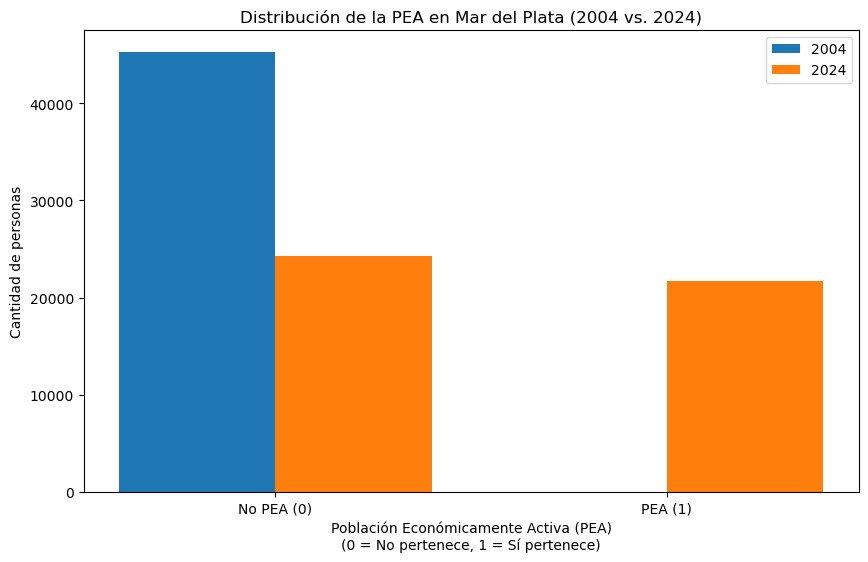

In [37]:
import matplotlib.pyplot as plt

# Crear figura y tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar barras para el año 2004 y 2024
# Se utiliza un pequeño desplazamiento horizontal para evitar superposición de las barras
plt.bar(pea_2004.index - 0.2, pea_2004.values, width=0.4, label='2004')
plt.bar(pea_2024.index + 0.2, pea_2024.values, width=0.4, label='2024')

# Configuración de etiquetas y títulos del gráfico
plt.xlabel('Población Económicamente Activa (PEA)\n(0 = No pertenece, 1 = Sí pertenece)')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de la PEA en Mar del Plata (2004 vs. 2024)')
plt.xticks([0, 1], ['No PEA (0)', 'PEA (1)'])  # Etiquetas en el eje x
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico en pantalla
plt.show()


La PEA incluye a quienes están ocupados o desocupados, es decir, activos en el mercado laboral. Al observar la composición por PEA entre 2004 y 2024, podemos ver cómo cambió la participación económica de la población. Si en 2024 hay una mayor proporción de personas en PEA comparado con 2004, indica un aumento de la actividad económica; si es menor, puede reflejar más personas inactivas o fuera del mercado de trabajo, como estudiantes o jubilados. Estos cambios pueden estar relacionados con factores demográficos, sociales o económicos.

Punto 8

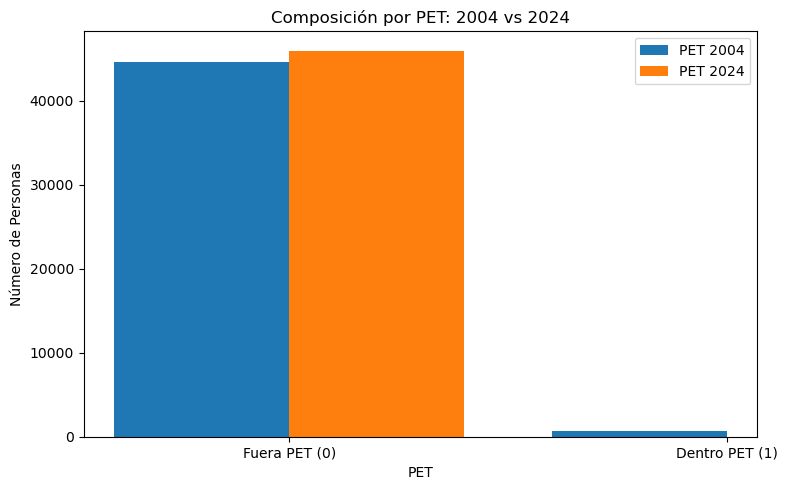

PET 2004: {0: 44598, 1: 691}
PET 2024: {0: 45969}


In [39]:
# Crear PET: 1 si edad entre 15 y 65, 0 en otro caso
resp_2004['PET'] = resp_2004['p47t'].between(15,65).astype(int)
resp_2024['PET'] = resp_2024['P47T'].between(15,65).astype(int)

# Contar distribución de PET
pet_2004 = resp_2004['PET'].value_counts().sort_index()
pet_2024 = resp_2024['PET'].value_counts().sort_index()

# Gráfico de barras para PET
plt.figure(figsize=(8,5))
plt.bar(pet_2004.index - 0.2, pet_2004.values, width=0.4, label='PET 2004')
plt.bar(pet_2024.index + 0.2, pet_2024.values, width=0.4, label='PET 2024')
plt.xticks([0,1], ['Fuera PET (0)','Dentro PET (1)'])
plt.xlabel('PET')
plt.ylabel('Número de Personas')
plt.title('Composición por PET: 2004 vs 2024')
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar conteos y comparar
print("PET 2004:", pet_2004.to_dict())
print("PET 2024:", pet_2024.to_dict())


La PET representa a la población en edad de trabajar (15 a 65 años), mientras que la PEA incluye solo a quienes están ocupados o buscando empleo. Por eso, la PEA siempre es menor o igual a la PET. Al comparar 2004 con 2024, vemos cómo cambió la cantidad de personas en edad de trabajar y cuántas de ellas participan activamente en el mercado laboral. Si la proporción PEA/PET aumenta, hay más personas activas; si disminuye, hay más inactividad dentro de la población en edad.

In [22]:
import pandas as pd

# Filtrar y agregar la columna 'desocupado' (1 si desocupado, 0 si no)
def agregar_desocupados(df, anio):
    # Para 2004, asumimos que la columna "h15" indica ocupación (0.0 = desocupado)
    if anio == 2004:
        df['desocupado'] = df['h15'].apply(lambda x: 1 if x == 0.0 else 0)
    else:
        # Para 2024, se asume que "desocupado" ya está disponible, pero se debe verificar
        df['desocupado'] = df['desocupado'].apply(lambda x: 1 if x == 1 else 0)
    
    return df

# Agrupar y calcular la proporción de desocupados por nivel educativo
def desocupados_por_educacion(df, anio):
    # Asumiendo que 'h15' es el indicador de ocupación en 2004 y 'CH14' en 2024
    if anio == 2004:
        col_educ = "h15"  # Aquí deberíamos verificar la columna de nivel educativo real
    else:
        col_educ = "CH14"
    
    # Filtrar los valores nulos
    df_filtrado = df.dropna(subset=[col_educ])
    
    # Agrupar por nivel educativo y calcular la proporción de desocupados
    tabla = df_filtrado.groupby(col_educ)["desocupado"].mean().reset_index()
    
    # Renombrar la columna para que sea entendible
    tabla.rename(columns={col_educ: "Nivel Educativo"}, inplace=True)
    tabla["Año"] = anio
    return tabla

# Llamar a las funciones para ambos años
df_2004 = agregar_desocupados(df_2004, 2004)
df_2024 = agregar_desocupados(df_2024, 2024)

# Proporción de desocupados por nivel educativo
edu_2004 = desocupados_por_educacion(df_2004, 2004)
edu_2024 = desocupados_por_educacion(df_2024, 2024)

# Concatenar los resultados
resultados = pd.concat([edu_2004, edu_2024])

# Mostrar los resultados
print(resultados)



   Nivel Educativo  desocupado   Año
0              0.0    1.000000  2004
1               Sí    0.000000  2004
2               No    0.000000  2004
0              0.0    0.414427  2024
1              1.0    0.503762  2024
2              2.0    0.473584  2024
3              3.0    0.458306  2024
4              4.0    0.587639  2024
5              5.0    0.766460  2024
6              6.0    0.778443  2024
7              7.0    0.688073  2024
8              8.0    0.633721  2024
9              9.0    0.437500  2024
10            98.0    0.853881  2024
11            99.0    0.430137  2024


C:\Users\Diego\AppData\Local\Temp\ipykernel_1860\725816975.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df_filtrado.groupby(col_educ)["desocupado"].mean().reset_index()
